## Precipitation Weighted Area Distribution (PWAD)

In [150]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as mpl
%matplotlib inline

import os
from scipy.io import loadmat

In [151]:
# all variables
percentiles= ['95th_percentile', '97th_percentile', '99th_percentile']
var_files= ['domain', 'convective_objects', 'aggregation_index', 'examples']
insts = ['IPSL','NOAA-GFDL','NASA-GISS','BCC','CNRM-CERFACS','NCAR'
        ,'NIMR-KMA','BNU','ICHEC','LASG-CESS','MPI-M','CMCC','INM','NCC' 
        ,'CCCma','MIROC','MOHC','MRI','NSF-DOE-NCAR']
vars= ['pr','hus','tas','convective_objects','aggregation_indelon']
scenarios= ['historical', 'rcp85']


# chosen
percentile= ['97th_percentile']
var_file= ['convective_objects']
inst = ['NOAA-GFDL']
var= ['convective_objects']
scenario= ['historical']


In [152]:
data_path = '/Users/cbla0002/Documents/data_matlab'
fileName = 'NOAA-GFDL_domain_pr_historical' 
file_path = os.path.abspath(os.path.join(data_path, '97th_percentile', 'domain', fileName))

data_domain = loadmat(file_path)
print(data_domain.keys())


dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'M_lat', 'M_lon', 'Rx1day_pr', 'Rx1day_pr_annual', 'Rx1day_pr_image', 'Rx5day_pr', 'Rx5day_pr_annual', 'Rx5day_pr_image', 'Wlat', 'Wlon', 'area_prctile', 'day_of_snapshot', 'gridbox_5day_pr', 'gridbox_pr', 'lat', 'lat_old', 'lon', 'lon_old', 'mean_pr_image', 'mean_pr_prctile_rate', 'mean_pr_prctile_vol', 'mean_pr_vol', 'prctile_rate_99', 'prctile_rate_99_9', 'prctile_rate_99_99', 'snapshot_pr_image', 'time_range', 'trop_end', 'trop_start'])


In [153]:
lon = np.squeeze(data_domain['lon'])
lat = np.squeeze(data_domain['lat'])
aream = np.transpose(data_domain['M_area'])
np.shape(aream)

(22, 128)

92474620296.0091

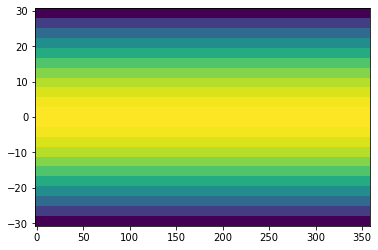

In [154]:
plt.pcolormesh(lon,lat,aream)
np.mean(aream)

In [155]:
fileName = inst[0] + '_convective_objects_' + scenario[0]
file_path = os.path.abspath(os.path.join(data_path, '97th_percentile', 'convective_objects', fileName))
data_convObj = loadmat(file_path)
print(data_convObj.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Nb_obj_day', 'Nb_obj_day_n', 'area_prctile', 'mean_pr_prctile_vol', 'obj_R_idx_n', 'obj_area', 'obj_area_n', 'obj_dist_M_idx_n', 'obj_lat', 'obj_lat_n', 'obj_lon', 'obj_lon_n', 'obj_pr', 'obj_pr_n', 'snapshot_n', 'snapshot_prctile'])


In [156]:
obj_area = np.squeeze(data_convObj['obj_area'])
obj_pr = np.squeeze(data_convObj['obj_pr'])
print(np.shape(obj_area))
print(np.shape(obj_pr))

(181134,)
(181134,)


In [157]:
def calc_rEff(area): # input as m^2
    return np.sqrt(area/np.pi)*1e-3

In [158]:
# define the bin width as the mean gridbox area (in terms of effective radius)
bin_width = calc_rEff(np.mean(aream))
bin_end = calc_rEff(np.max(obj_area))
bins = np.arange(0, bin_end+bin_width, bin_width)
bins_mid = np.append(0,bins*0.5*bin_width)

np.shape(bins_mid)

(13,)

In [159]:
print(bin_end)

bins = np.arange(0, bin_end+bin_width, bin_width)

print(bins[-2:])

1746.5221770420374
[1715.68021092 1887.24823201]


In [160]:
def calc_pwad_bin(idx): #, obj_area, obj_pr
    return np.sum(idx*obj_area*obj_pr)/(np.sum(obj_area*obj_pr))

In [161]:
# place precipitation from each object falling in the respective bins (PAWD)
pwad_bins = []
obj_r = calc_rEff(obj_area)

for i in np.arange(0,len(bins)-1):
    idx = (obj_r>bins[i]) & (obj_r<=bins[i+1])
    pwad_bins = np.append(pwad_bins,calc_pwad_bin(idx))

y = np.append(0, pwad_bins)
y = np.append(y,0)*100

In [162]:
print(np.shape(bins_mid))
print(np.shape(y))

(13,)
(13,)


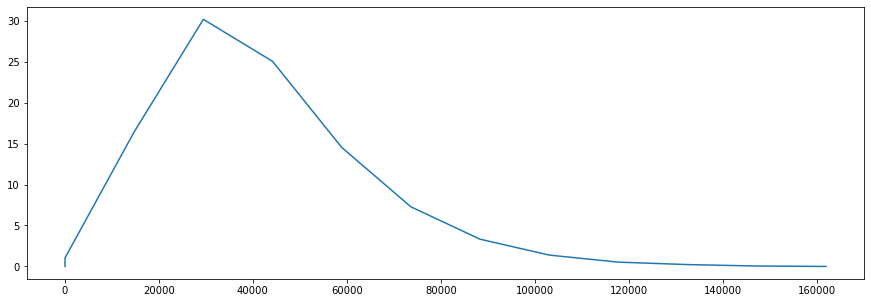

In [177]:
plt.figure(figsize = (15,5))
plt.plot(bins_mid,y)

<BarContainer object of 13 artists>

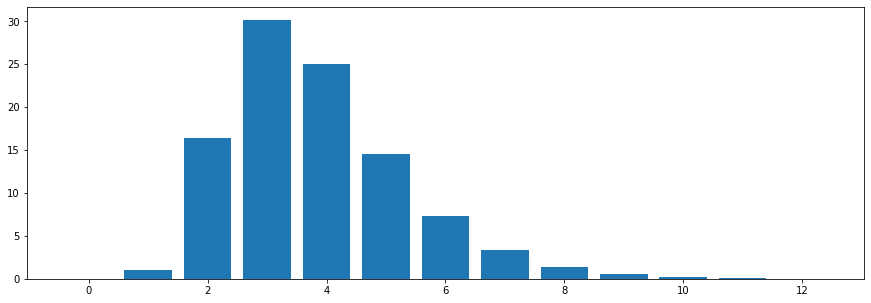

In [189]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(0,13),y)